<a href="https://colab.research.google.com/github/Suraez/nepali-news-headline-generator/blob/main/nepaliNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pickle
def load_headline_from_file():
    with open('/content/output.pkl', 'rb') as file:
        lst = pickle.load(file)
    return lst

In [ ]:
headlineList = load_headline_from_file()
print('\n'.join([headline for headline in headlineList]))

In [5]:
def view_dataset(dataset):
  print('\n'.join([headline for headline in dataset]))

In [6]:
headlineList[0]

'विज्ञान नसमेटिएको नीति तथा कार्यक्रम'

In [7]:
import string
def clean_dataset():
    processed_sentences = []
    for sentence in headlineList:
        # Remove punctuation
        sentence = sentence.translate(str.maketrans('', '', string.punctuation))
        # Remove double spaces
        sentence = ' '.join(sentence.split())
        processed_sentences.append(sentence)
    return processed_sentences

In [8]:
cleanedHeadlines = clean_dataset()

In [ ]:
view_dataset(cleanedHeadlines)

In [10]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

In [11]:
tokenizer.fit_on_texts(cleanedHeadlines)

In [12]:
wordVocab = tokenizer.word_index

In [13]:
def create_data_sequence():
  data_sequence=[]
  for headline in cleanedHeadlines:
    tempSequence = tokenizer.texts_to_sequences([headline])[0]
    for i in range(1, len(tempSequence)):
      data_sequence.append(tempSequence[:i+1])

  return data_sequence

In [14]:
data_sequence = create_data_sequence()

In [15]:
def pad_data_sequence():
  maxLengthDataSequence = max([len(sequence) for sequence in data_sequence])
  for sequence in data_sequence:
    padding_size = maxLengthDataSequence - len(sequence)
    padding = [0] * padding_size
    sequence[:0] = padding


In [16]:
pad_data_sequence()

In [17]:
import numpy as np

input_output_tensor = np.array(data_sequence)
print(input_output_tensor.shape)

(113, 12)


In [18]:
input_tensor = input_output_tensor[:, :-1]
output_tensor = input_output_tensor[:,-1]

In [19]:
input_tensor.shape

(113, 11)

In [20]:
output_tensor.shape

(113,)

In [21]:
output_tensor

array([ 10,   1,   5,   2,   3,  12,  13,   1,   2,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  26,  27,  28,  29,  30,  31,  32,
        33,  35,  36,  37,  38,  39,  41,  42,  43,  44,  45,  46,  48,
        49,  50,  51,  52,  53,   4,  55,   3,  56,  57,  58,  60,  61,
        62,   6,  63,  64,  65,  66,  67,  69,  70,  71,  72,  73,   7,
        74,  76,  77,  78,  79,  80,   6,   4,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,   4,  93,  94,   3,  95,  96,  97,  98,
        99, 100, 101,   7,   5,   2, 102, 103, 104, 106, 107, 108, 109,
       110, 111,   8, 113, 114,   8, 115, 117, 118])

In [22]:
import tensorflow as tf
output_tensor = tf.keras.utils.to_categorical(output_tensor, len(wordVocab) + 1)

In [23]:
input_tensor.shape

(113, 11)

In [26]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

vocabLen = len(wordVocab) + 1

model = Sequential()
model.add(Embedding(vocabLen, 100, input_length=11))
model.add(Dense(100))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(vocabLen, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [27]:
history = model.fit(input_tensor, output_tensor, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 4s 351ms/step - loss: 4.7809 - accuracy: 0.0111 - val_loss: 4.7874 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 4.7685 - accuracy: 0.0667 - val_loss: 4.7914 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 33ms/step - loss: 4.7591 - accuracy: 0.0333 - val_loss: 4.7984 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 36ms/step - loss: 4.7442 - accuracy: 0.0889 - val_loss: 4.8095 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 32ms/step - loss: 4.7259 - accuracy: 0.0222 - val_loss: 4.8323 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 4.6960 - accuracy: 0.0444 - val_loss: 4.8809 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 34ms/step - loss: 4.6460 - accuracy: 0.0222 - val_loss: 4.9966 - val_accuracy: 0.

###Plotting the model performance

In [28]:
accuracyList = history.history['accuracy']
valAccuracyList = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']

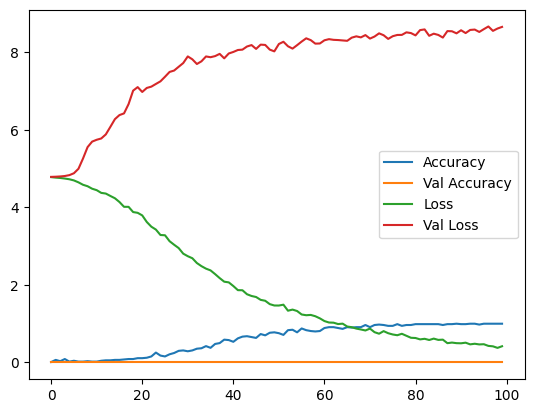

In [29]:
from matplotlib import pyplot as plt

plt.plot(accuracyList)
plt.plot(valAccuracyList)
plt.plot(loss)
plt.plot(valLoss)
plt.legend(['Accuracy', 'Val Accuracy', 'Loss', 'Val Loss'])
plt.show()

###Prediction Part

In [30]:
def get_padded_seqeunce(seed_text):
  # cleaning the sentence
  sentence = seed_text.translate(str.maketrans('', '', string.punctuation))
  sentence = ' '.join(sentence.split())
  #generate sequence of known words in the vocabulary
  sentence_sequence = tokenizer.texts_to_sequences([sentence])[0]
  maxLengthDataSequence = max([len(sequence) for sequence in data_sequence])
  padding_size = maxLengthDataSequence - len(sentence_sequence) - 1
  padding = [0] * padding_size
  sentence_sequence[:0] = padding
  return sentence_sequence


In [31]:
def generate_headline(seed_text, lengthOfNews, model):

  while len(seed_text.split(' ')) < lengthOfNews:
    textPaddedSequence = get_padded_seqeunce(seed_text)
    predictedIndex = np.argmax(model.predict([textPaddedSequence], verbose=0))
    for word, index in wordVocab.items():
      if index == predictedIndex:
        seed_text += " " + word

  return seed_text








In [32]:
generate_headline('शरणार्थीको विषय जनता', 10, model)

'शरणार्थीको विषय जनता र विदेशीको चासोमा परिसक्यो परिसक्यो पक्राउ पक्राउ'

###Saving the model part

In [33]:
pwd

'/content'

In [36]:
model.save('/content/1/')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/nepali_news_headline_model.hdf5')
loaded_model.summary()

In [ ]:
!zip -r folder.zip ./*

### Now predictin with the help of loaded model

In [39]:
paddedSequence = get_padded_seqeunce('काम नगर्ने ठेकेदारलाई')
paddedSequence

[0, 0, 0, 0, 0, 0, 0, 0, 25, 26, 27]

In [40]:
paddedSequence = get_padded_seqeunce('काम नगर्ने ठेकेदारलाई')
predictedIndex = np.argmax(loaded_model.predict([paddedSequence], verbose=0))
predictedIndex

28

In [41]:
generate_headline('काम नगर्ने ठेकेदारलाई', 10, loaded_model)

'काम नगर्ने ठेकेदारलाई सरकारले पटक–पटक म्याद थप्दैन मन्त्री गुरूङ गुरूङ'